## Implementation of the Metropolis-Hastings Algorithm

Here I will implement the Metropolis-Hastings algorithm, and prove it with the following target distribution:

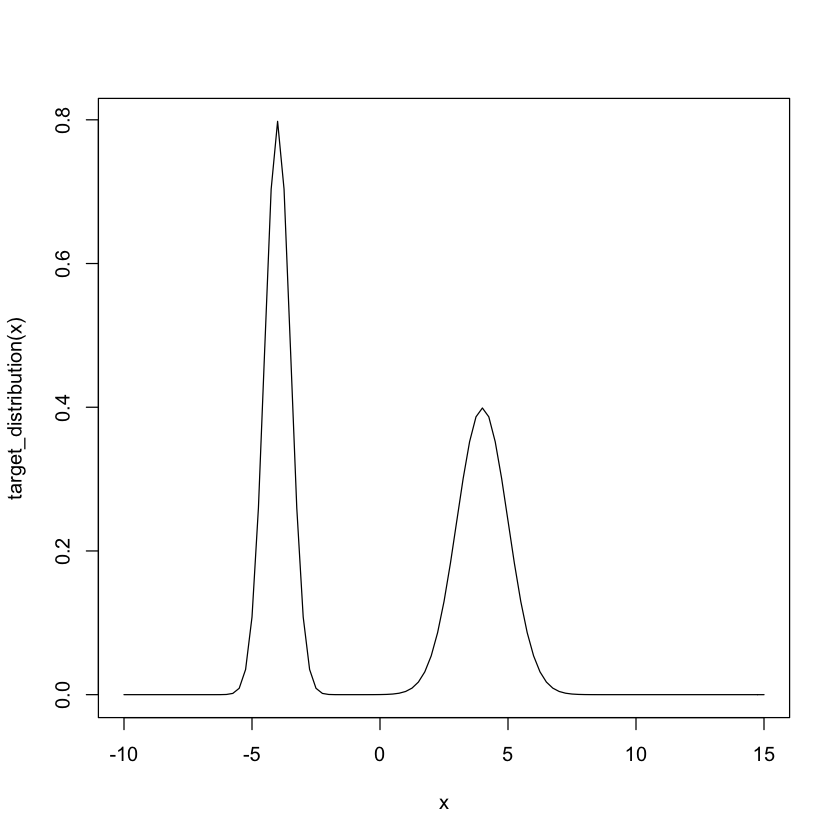

In [19]:
curve(target_distribution, from=-10, to=15)

In [41]:
## Define target and proposal distributions
target_distribution <- function(x) {  
    return(dnorm(x, -4, 0.5) + dnorm(x,4,1)) 
}

rproposal <- function(x_t, sigma){
    return(rnorm(1, x_t, sigma))
}

dproposal <- function(x, x_t, sigma){   
    return(dnorm(x, x_t, sigma))
}

### The acceptance rate will use the target distribution so our samples 
### are not just a random walk in the proposal distribution
acceptance_rate <- function(x, x_t, sigma){    
    return( (target_distribution(x) * dproposal(x_t, x, sigma)) / 
           (target_distribution(x_t) * dproposal(x, x_t, sigma)))
}

In [42]:
## Now we define the algorithm
metropolis_hastings <- function (nsamples, sigma){
    x = 0
    xvals <- c()
    
    for (i in 1:nsamples) {
        x_t = x
        x = rproposal(x_t, sigma)
        a = acceptance_rate(x, x_t, sigma)
        
        if (a > runif(1)){
            xvals = c(xvals, x)            
        }
        
        else {
           xvals = c(xvals, x_t)
           x = x_t
        }        
        }
    return(xvals)
}

Now we will compare the behaviour using different sigma values for our proposal distribution

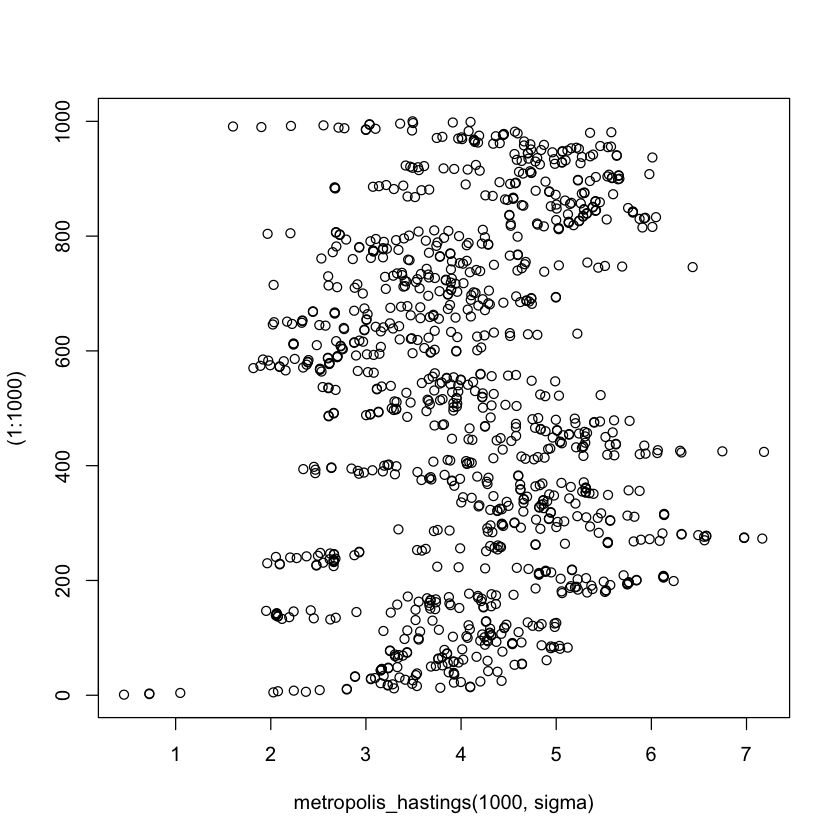

In [43]:
sigma = 0.5
plot(metropolis_hastings(1000, sigma), (1:1000))

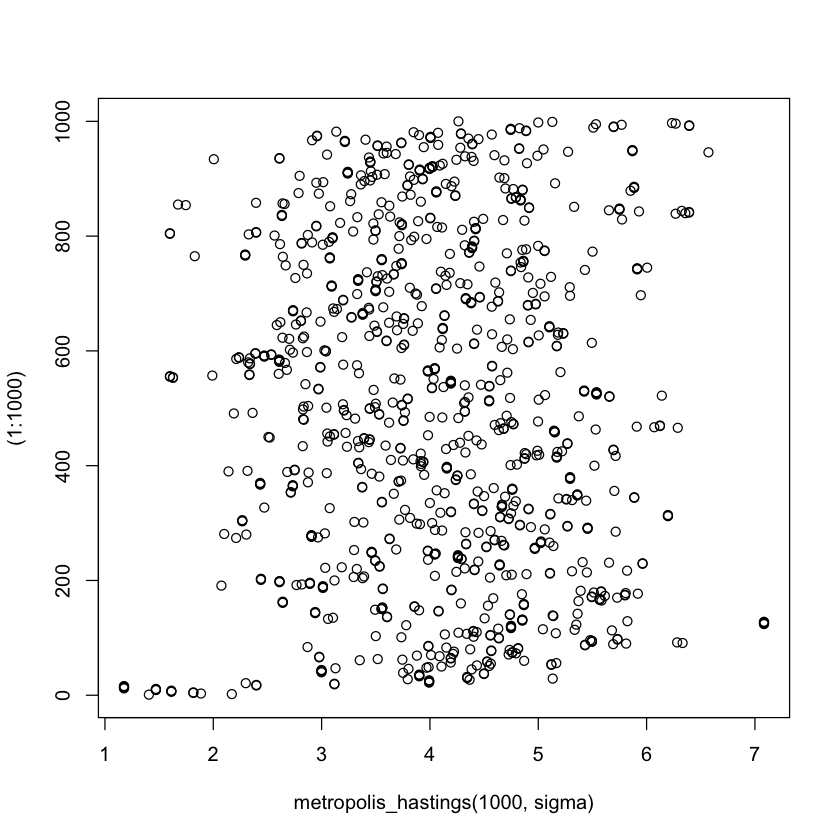

In [44]:
sigma = 1
plot(metropolis_hastings(1000, sigma), (1:1000))

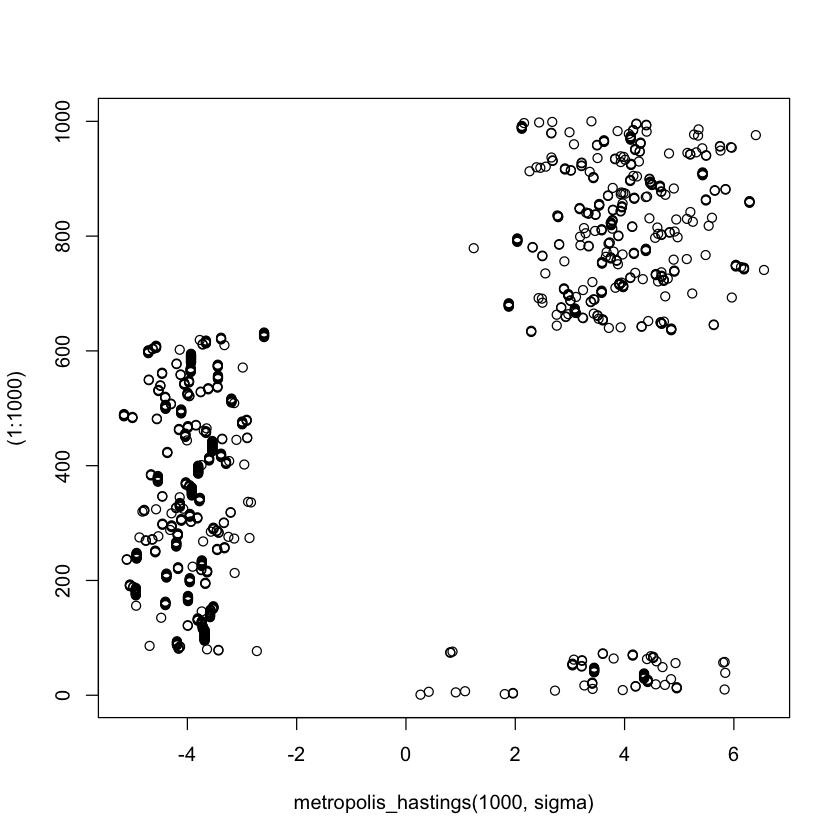

In [45]:
sigma = 2
plot(metropolis_hastings(1000, sigma), (1:1000))

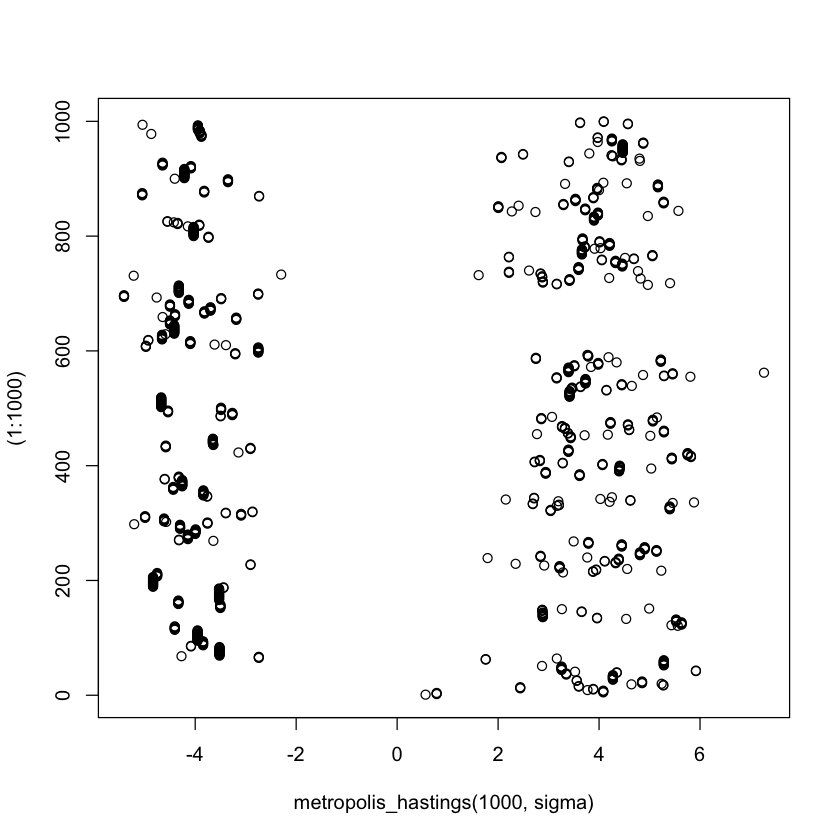

In [46]:
sigma = 4
plot(metropolis_hastings(1000, sigma), (1:1000))

In this example, only the sigma value of 4 shows the desired behaviour, giving us a bunch of samples centered around -4 and another centered around 5. Notice that we initialized our Metropolis-Hastings algorithm with a x_t value of 0. Our samples should be independent from the initializations if we run the algorithm for long enough. However, using a small sigma value in our proposal distribution here resulted in we never taking samples from the peak around -4, as we start at 0 and never take jumps large enough to reach the other peak. If we ran it for long enough we would eventually get there with a small sigma too, but a 1000 samples was not enough to achieve it.